In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. *import pandas as pd*: Baris ini mengimpor pustaka Pandas dan memberikan alias pd untuk memudahkan penggunaan selanjutnya. Pandas adalah pustaka yang digunakan untuk analisis data dan manipulasi dataset tabular.
2. *pd.plotting.register_matplotlib_converters()*: Ini adalah panggilan fungsi yang mendaftarkan konverter Pandas untuk memastikan kompatibilitas antara Pandas dan Matplotlib. Ini diperlukan agar tanggal dan waktu dalam DataFrame Pandas dapat diplot dengan benar menggunakan Matplotlib.
3. *import matplotlib.pyplot as plt*: Baris ini mengimpor pustaka Matplotlib untuk membuat visualisasi grafik dan plot data.
4. *%matplotlib inline*: Ini adalah magic command khusus untuk Jupyter Notebook. Ini memastikan bahwa plot yang dihasilkan oleh Matplotlib akan ditampilkan secara langsung di dalam notebook.
5. *import seaborn as sns*: Ini mengimpor pustaka Seaborn, yang merupakan pustaka visualisasi data yang dibangun di atas Matplotlib. Seaborn menyediakan antarmuka yang lebih mudah digunakan untuk menghasilkan plot yang menarik.
6. *print("Setup Complete")*: Baris ini hanya mencetak pesan “Setup Complete” ke konsol. Ini hanya untuk memberi tahu kita bahwa semua pustaka telah diimpor dengan sukses.

In [4]:
Healthcare_filepath = "/content/drive/MyDrive/Visialisasi data/Healthcare-Diabetes.csv"

# Read the file into a variable fifa_data
data = pd.read_csv(Healthcare_filepath, index_col="Id", parse_dates=True)

In [ ]:
# Load the CSV file
data = pd.read_csv('Healthcare-Diabetes.csv')
data.head()



,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


1. *pd.read_csv('Healthcare-Diabetes.csv')*: Baris ini menggunakan fungsi read_csv dari Pandas untuk membaca file CSV dengan nama 'Healthcare-Diabetes.csv'. Fungsi ini mengonversi isi file CSV menjadi sebuah DataFrame (struktur data tabular) yang disimpan dalam variabel data.
2. *data.head()*: Setelah membaca file, kita menggunakan metode *head()* untuk menampilkan lima baris pertama dari DataFrame *data*. Ini membantu kita memahami struktur data dan melihat beberapa contoh data awal.

Jadi, kode ini akan membaca file CSV dengan nama 'Healthcare-Diabetes.csv' dan menyimpannya dalam variabel *data*.

In [ ]:
data.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
data.shape

(2768, 10)

Jumlah baris dan kolom dalam DataFrame data adalah (baris: 2768, kolom: 10). Ini berarti kita memiliki 1000 entri data dengan 10 fitur atau atribut yang masing-masing menggambarkan karakteristik tertentu

In [ ]:
list(data.columns)

['Id',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Berikut adalah kode untuk menampilkan daftar kolom dalam DataFrame *data*

In [ ]:
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dalam DataFrame* data*, kita dapat menggunakan metode *.isnull().sum()* untuk menghitung jumlah nilai **null** (kosong) dalam setiap kolom

In [ ]:
corr = data.corr()
corr

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.007359,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.007359,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


1. corr: Variabel ini menyimpan hasil dari metode .corr(). Ini akan menjadi DataFrame baru yang menunjukkan koefisien korelasi antara setiap pasangan kolom dalam DataFrame asli (dataset).
-  -1: Menunjukkan hubungan linear negatif sempurna (saat satu variabel meningkat, variabel lain menurun secara proporsional).
- 0: Menunjukkan tidak ada hubungan linear antara variabel.
- +1: Menunjukkan hubungan linear positif sempurna (saat satu variabel meningkat, variabel lain meningkat secara proporsional).
- Nilai yang lebih dekat dengan -1 atau +1 menunjukkan hubungan yang lebih kuat (baik negatif atau positif), sedangkan nilai yang lebih dekat dengan 0 menunjukkan hubungan yang lebih lemah atau tidak ada hubungan linear.



<Axes: >

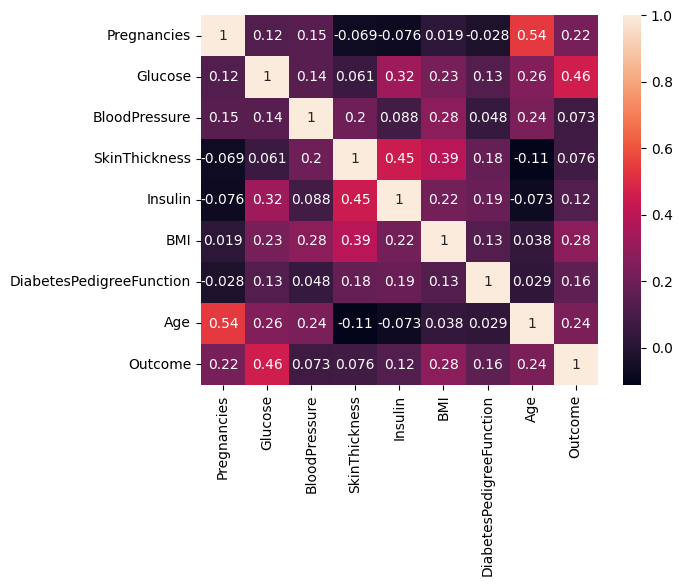

In [ ]:
sns.heatmap(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True)

Kode di atas menghasilkan sebuah heatmap menggunakan library Seaborn untuk memvisualisasikan korelasi antar variabel dalam DataFrame *data*.

- *data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]* digunakan untuk memilih subset kolom tertentu dari DataFrame data. Ini termasuk kolom-kolom yang ingin kita analisis korelasinya.
- *corr()* kemudian digunakan untuk menghitung korelasi antar kolom-kolom tersebut.
- *sns.heatmap()* digunakan untuk membuat heatmap dari matriks korelasi yang dihasilkan.
- Argumen *annot=True* menandakan bahwa nilai korelasi akan ditampilkan di dalam sel-sel heatmap untuk memberikan informasi lebih lanjut tentang tingkat korelasi antar pasangan variabel.

Heatmap adalah metode yang bagus untuk memvisualisasikan korelasi antar variabel dalam bentuk warna yang mudah dibaca, di mana warna yang lebih terang menunjukkan korelasi yang lebih tinggi, sedangkan warna yang lebih gelap menunjukkan korelasi yang lebih rendah atau tidak ada korelasi.

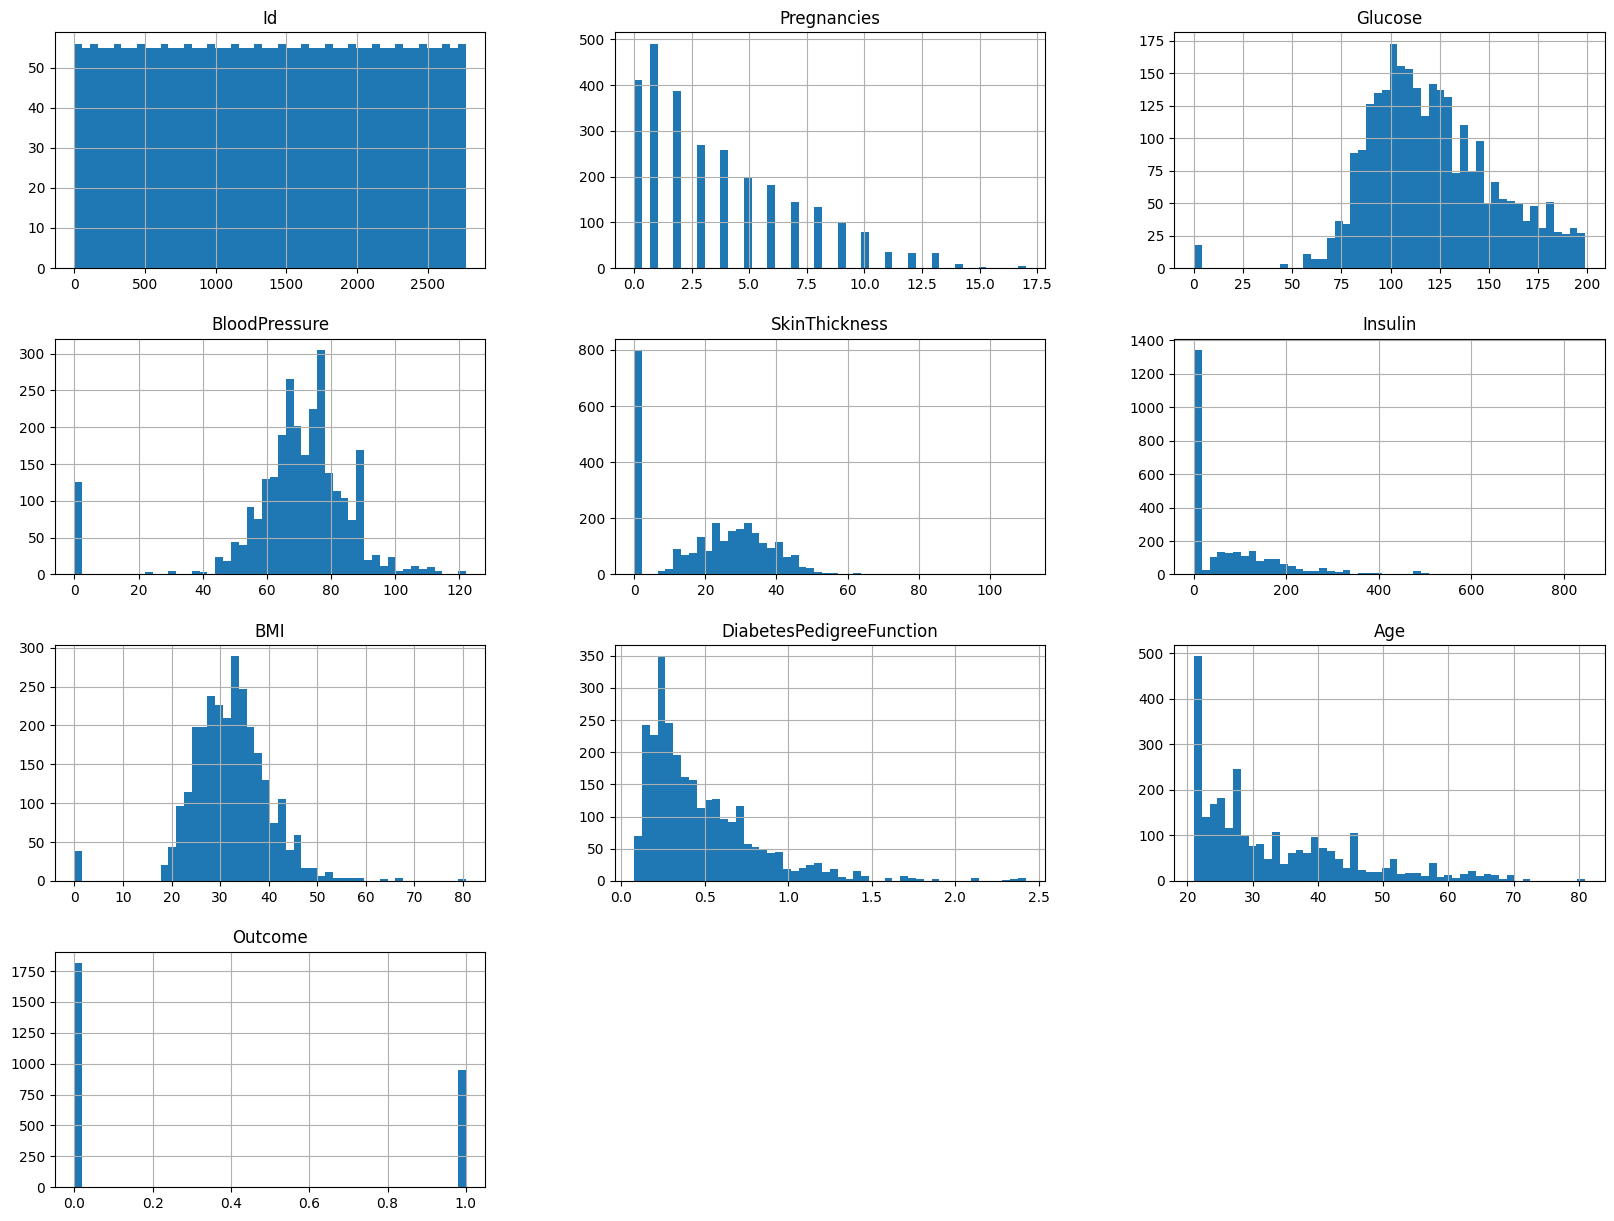

In [ ]:
data.hist(bins = 50, figsize=(20,15))
plt.show()

Kode di atas digunakan untuk membuat histogram dari seluruh kolom dalam DataFrame *data*. Histogram adalah plot yang menampilkan distribusi frekuensi dari sebuah data numerik.

- *data.hist()* digunakan untuk membuat histogram dari seluruh kolom dalam DataFrame data.
- Argumen *bins=50* menentukan jumlah bins atau kelas yang digunakan dalam pembuatan histogram. Nilai ini dapat disesuaikan sesuai kebutuhan analisis.
- *figsize=(20,15)* digunakan untuk menentukan ukuran gambar (panjang, lebar) dalam satuan inch.
- *plt.show()* digunakan untuk menampilkan plot histogram.

Hasilnya adalah sejumlah histogram yang menunjukkan distribusi dari masing-masing variabel dalam dataset. Histogram membantu kita memahami sebaran nilai-nilai dalam dataset, termasuk apakah terdapat pencilan (outliers) atau tidak, serta bentuk distribusi datanya

In [ ]:
Age_statistik = data['Age'].describe()
print(Age_statistik)

count    2768.000000
mean       33.132225
std        11.777230
min        21.000000
25%        24.000000
50%        29.000000
75%        40.000000
max        81.000000
Name: Age, dtype: float64


1. *Age_statistik = data['Age'].describe():* Baris pertama menghitung statistik deskriptif untuk kolom 'Age' dari DataFrame *data* menggunakan metode *describe()*. Statistik deskriptif ini mencakup jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum (max). Hasilnya disimpan dalam variabel *Age_statistik*.

2. *print(Age_statistik)*: Baris kedua mencetak statistik deskriptif yang telah dihitung untuk kolom 'Age' menggunakan fungsi *print()*. Ini akan menampilkan statistik deskriptif tersebut di output.

Statistik deskriptif seperti ini membantu untuk memahami distribusi dan karakteristik dari data pada kolom 'Age'

In [ ]:
print(data.head())
data.to_csv("Healthcare-Diabetes.csv'")

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


1. *print(data.head()):* Kode ini akan mencetak lima baris pertama dari DataFrame data, memberikan kita gambaran awal tentang struktur dan isi dari dataset.

2. *data.to_csv("Healthcare-Diabetes.csv")*: Kode ini akan menyimpan DataFrame *data* menjadi sebuah file CSV dengan nama "Healthcare-Diabetes.csv". Fungsi *to_csv()* digunakan untuk menyimpan data ke dalam format CSV. Dalam hal ini, DataFrame *data* akan disimpan sebagai file CSV dengan nama yang telah ditentukan.

Penyimpanan dataset ke dalam format CSV berguna untuk menyimpan data dan digunakan pada tahapan analisis atau untuk berbagi data dengan orang lain yang mungkin memerlukan data dalam format tersebut

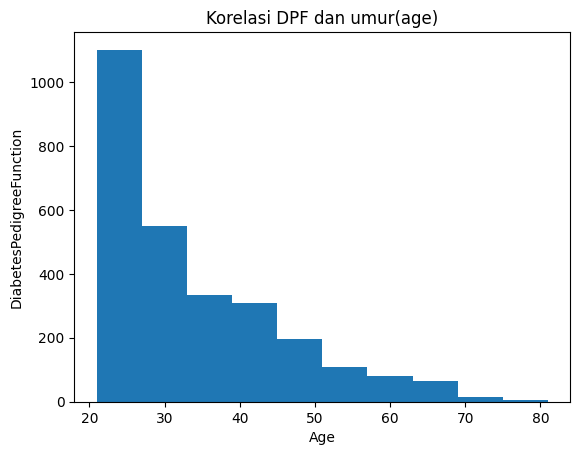

In [5]:
plt.hist(data['Age'])
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.title('Korelasi DPF dan umur(age)')
plt.show()

1. plt.hist adalah fungsi dari library matplotlib.pyplot yang digunakan untuk membuat histogram.
2. plt.xlabel digunakan untuk memberi label pada sumbu x.
3. plt.ylabel digunakan untuk memberi label pada sumbu y.
4. plt.title digunakan untuk memberi judul pada plot.
5. plt.show digunakan untuk menampilkan plot.

Sumbu X: Menunjukkan usia pasien dalam rentang 20 hingga 80 tahun.
Sumbu Y: Menunjukkan DPF atau angka resio genetik.


Gambar menunjukkan menunjukkan bahwa hubungan antara Diabetespedigreefunction (DPF) dan age memiliki korelasi yang rendah. Dengan kata lain, tidak ada hubungan yang signifikan antara DPF dan age dalam dataset

In [ ]:
korelasi = data['BMI'].corr(data['Age'])
print('Korelasi:', korelasi)

Korelasi: 0.03817522184417518


Nilai korelasi menunjukkan kekuatan dan arah hubungan antara BMI dan Age:
- Nilai positif: Hubungan positif (Age meningkat seiring BMI naik).
- Nilai negatif: Hubungan negatif (Age menurun seiring BMI naik).
- Nilai mendekati 0: Tidak ada hubungan yang signifikan.
- Semakin besar nilai absolut (tanpa memperhatikan positif/negatif), semakin kuat hubungannya.

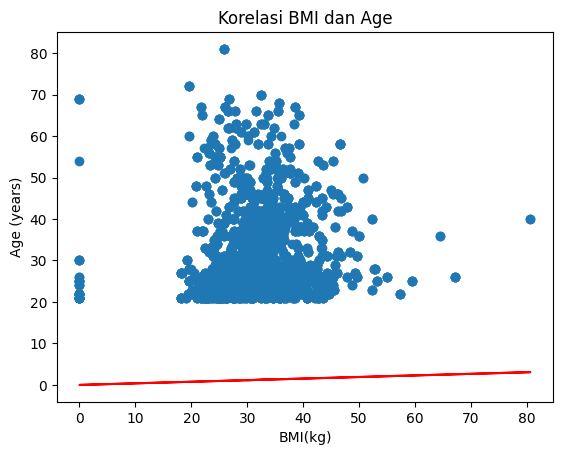

In [ ]:
<plt.scatter(data['BMI'], data['Age'])
plt.plot(data['BMI'], data['BMI'] * korelasi, color='red')
plt.xlabel('BMI(kg)')
plt.ylabel('Age (years)')
plt.title('Korelasi BMI dan Age')
plt.show().

1. Scatter Plot

- plt.scatter(data['BMI'], data['Age']): Fungsi ini membuat scatter plot dengan:
- data['BMI']: nilai BMI pada sumbu X.
- data['Age']: nilai Age pada sumbu Y.

2. Garis Regresi

- plt.plot(data['BMI'], data['BMI'] * korelasi, color='red'): Fungsi ini menambahkan garis regresi berwarna merah:
- data['BMI']: nilai BMI pada sumbu X.
- data['BMI'] * korelasi: estimasi Age berdasarkan BMI, dihitung dengan mengalikan BMI dengan koefisien korelasi (nilai korelasi tidak ditampilkan dalam kode).
- color='red': warna garis merah.


Gambar menunjukkan bahwa BMI merupakan salah satu faktor risiko diabetes. Pasien dengan BMI tinggi lebih berisiko terkena diabetes dibandingkan dengan pasien dengan BMI normal.